<a href="https://colab.research.google.com/github/angginadwif/Project-Loan-Interest-Rate-Prediction/blob/main/Loan_Interest_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 67.3MB 58kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# A. Data Exploration

In [ ]:
#import library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool, cv

# evaluation
from sklearn.metrics import f1_score

In [ ]:
# set options
# changing the display settings
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [ ]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [ ]:
# combining two datasets
data_full = pd.concat([train,test],axis=0)
data_full = data_full.reset_index().drop("index",axis=1)
data_full

In [ ]:
# find out row and coloumn from data_full
data_full.shape

In [ ]:
# find out row and coloumn from train
train.shape

(164309, 14)

In [ ]:
# find out row and coloumn from test
test.shape

(109541, 13)

In [ ]:
#1. Data exploration with head(), info(), describe()
print("\n[1] Data eksplorasi dengan head(), info(), describe()")
print("Top five records:")
print(data_full.head())
print("Information dataset:")
print(data_full.info())
print("Statistik deskriptif dataset:")
print(data_full.describe())


[1] Data eksplorasi dengan head(), info(), describe()
Top five records:
    Loan_ID Loan_Amount_Requested Length_Employed Home_Owner  Annual_Income  \
0  10000001  7,000                 < 1 year        Rent       68000.0         
1  10000002  30,000                4 years         Mortgage  NaN              
2  10000003  24,725                7 years         Mortgage   75566.4         
3  10000004  16,000                < 1 year        NaN        56160.0         
4  10000005  17,000                8 years         Own        96000.0         

            Income_Verified     Purpose_Of_Loan  Debt_To_Income  \
0  not verified              car                 18.37            
1  VERIFIED - income         debt_consolidation  14.93            
2  VERIFIED - income source  debt_consolidation  15.88            
3  VERIFIED - income source  debt_consolidation  14.34            
4  VERIFIED - income source  debt_consolidation  22.17            

   Inquiries_Last_6Mo  Months_Since_Deliquency  N

In [ ]:
# count Length_Employed based on age
train.Length_Employed.value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years      9784 
7 years      9308 
6 years      9094 
8 years      7917 
9 years      6285 
Name: Length_Employed, dtype: int64

In [ ]:
# count Length_Employed based on age
test.Length_Employed.value_counts()

10+ years    35413
2 years      9800 
3 years      8504 
< 1 year     8328 
5 years      7228 
1 year       6914 
4 years      6609 
6 years      6257 
7 years      6136 
8 years      5198 
9 years      4218 
Name: Length_Employed, dtype: int64

In [ ]:
# count Home_Owner with data train
train["Home_Owner"].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other       49   
None        10   
Name: Home_Owner, dtype: int64

In [ ]:
# count Home_Owner with data test
test["Home_Owner"].value_counts()

Mortgage    46925
Rent        37511
Own         8354 
Other       30   
None        10   
Name: Home_Owner, dtype: int64

In [ ]:
# count Income_Verified with data train
train["Income_Verified"].value_counts()

VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

In [ ]:
# count Income_Verified with data test
test["Income_Verified"].value_counts()

VERIFIED - income           39655
VERIFIED - income source    35238
not verified                34648
Name: Income_Verified, dtype: int64

In [ ]:
# count Purpose_Of_Loan with data train
train["Purpose_Of_Loan"].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement      9269 
other                 8346 
major_purchase        3435 
small_business        2392 
car                   1885 
medical               1541 
moving                974  
vacation              837  
wedding               828  
house                 773  
renewable_energy      123  
educational           121  
Name: Purpose_Of_Loan, dtype: int64

In [ ]:
# count Purpose_Of_Loan with data test
test["Purpose_Of_Loan"].value_counts()

debt_consolidation    64302
credit_card           24710
home_improvement      6186 
other                 5500 
major_purchase        2277 
small_business        1672 
car                   1264 
medical               1092 
moving                701  
vacation              616  
house                 543  
wedding               517  
renewable_energy      83   
educational           78   
Name: Purpose_Of_Loan, dtype: int64

In [ ]:
# count gender with data train
train["Gender"].value_counts()

Male      117176
Female    47133 
Name: Gender, dtype: int64

In [ ]:
# count gender with data train
test["Gender"].value_counts()

Male      77817
Female    31724
Name: Gender, dtype: int64

In [ ]:
# count Interest_Rate with data train
train["Interest_Rate"].value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

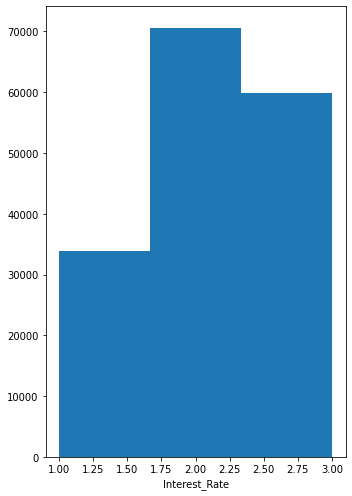

In [ ]:
# Exploration data with visualization
# Visualization The number of users is divided into ranges Interest Category (Interest_Rate) using a histogram (hist ()) plot
plt.figure(figsize=(5, 7))
plt.hist(data_full['Interest_Rate'], bins = data_full.Interest_Rate.nunique())
plt.xlabel('Interest_Rate')
plt.tight_layout()
plt.show()

# B. Data Pre-Processing

In [ ]:
# Checks the dataset with NULL values
print(train.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(train.isnull().sum().sum())

Loan_ID                    0    
Loan_Amount_Requested      0    
Length_Employed            7371 
Home_Owner                 25349
Annual_Income              25102
Income_Verified            0    
Purpose_Of_Loan            0    
Debt_To_Income             0    
Inquiries_Last_6Mo         0    
Months_Since_Deliquency    88379
Number_Open_Accounts       0    
Total_Accounts             0    
Gender                     0    
Interest_Rate              0    
dtype: int64

Counting total missing value:
146201


In [ ]:
# Checks the dataset with NULL values
print(test.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(test.isnull().sum().sum())

Loan_ID                    0    
Loan_Amount_Requested      0    
Length_Employed            4936 
Home_Owner                 16711
Annual_Income              16898
Income_Verified            0    
Purpose_Of_Loan            0    
Debt_To_Income             0    
Inquiries_Last_6Mo         0    
Months_Since_Deliquency    58859
Number_Open_Accounts       0    
Total_Accounts             0    
Gender                     0    
dtype: int64

Counting total missing value:
97404


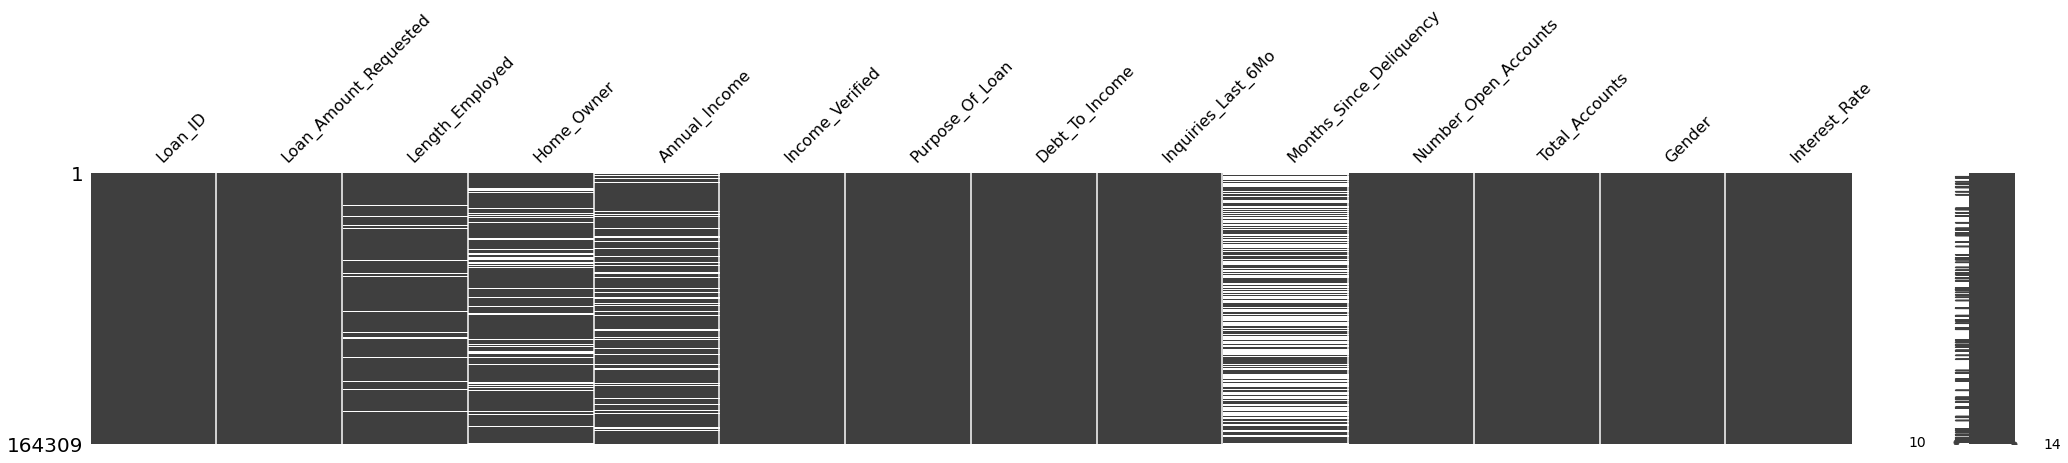

In [ ]:
# Visualization the dataset train
missingno.matrix(train, figsize = (35,5))

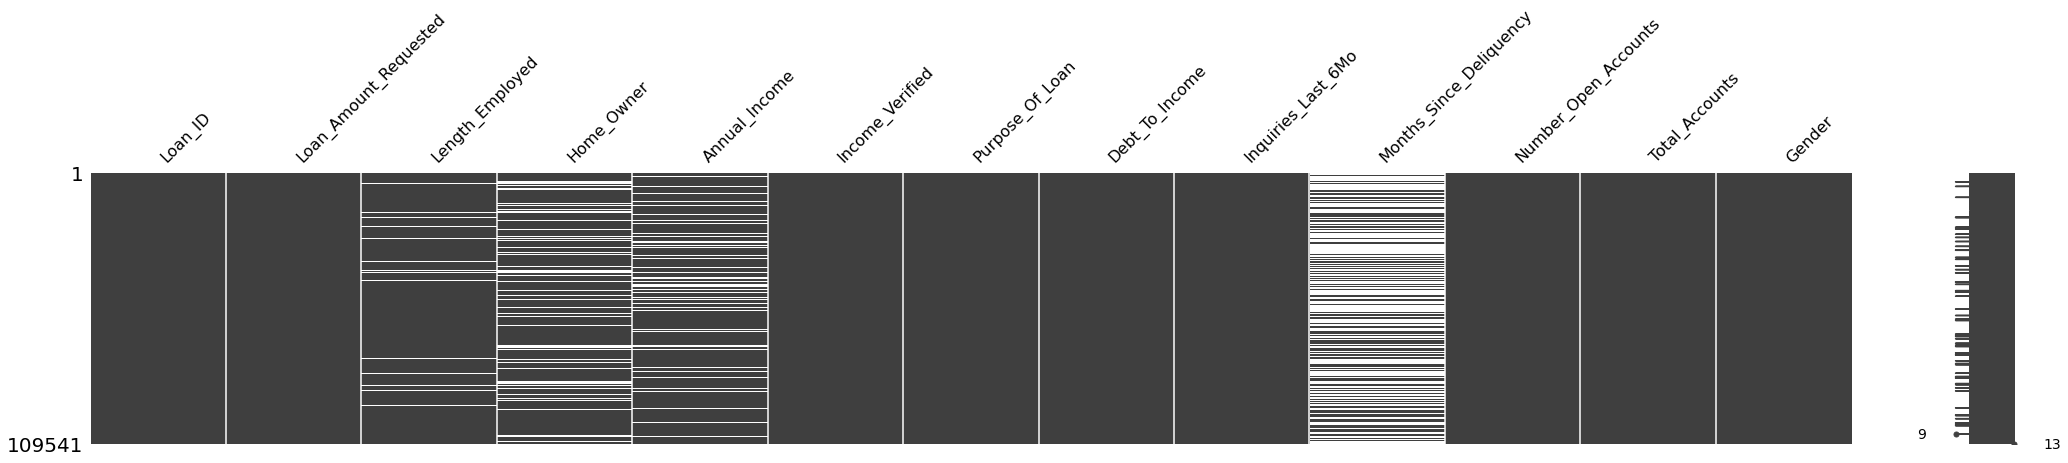

In [ ]:
# Visualization the dataset test
missingno.matrix(test, figsize = (35,5))

In [ ]:
# combine 2 data 
data_full.isnull().sum()

Loan_ID                    0     
Loan_Amount_Requested      0     
Length_Employed            12307 
Home_Owner                 42060 
Annual_Income              42000 
Income_Verified            0     
Purpose_Of_Loan            0     
Debt_To_Income             0     
Inquiries_Last_6Mo         0     
Months_Since_Deliquency    147238
Number_Open_Accounts       0     
Total_Accounts             0     
Gender                     0     
Interest_Rate              109541
dtype: int64

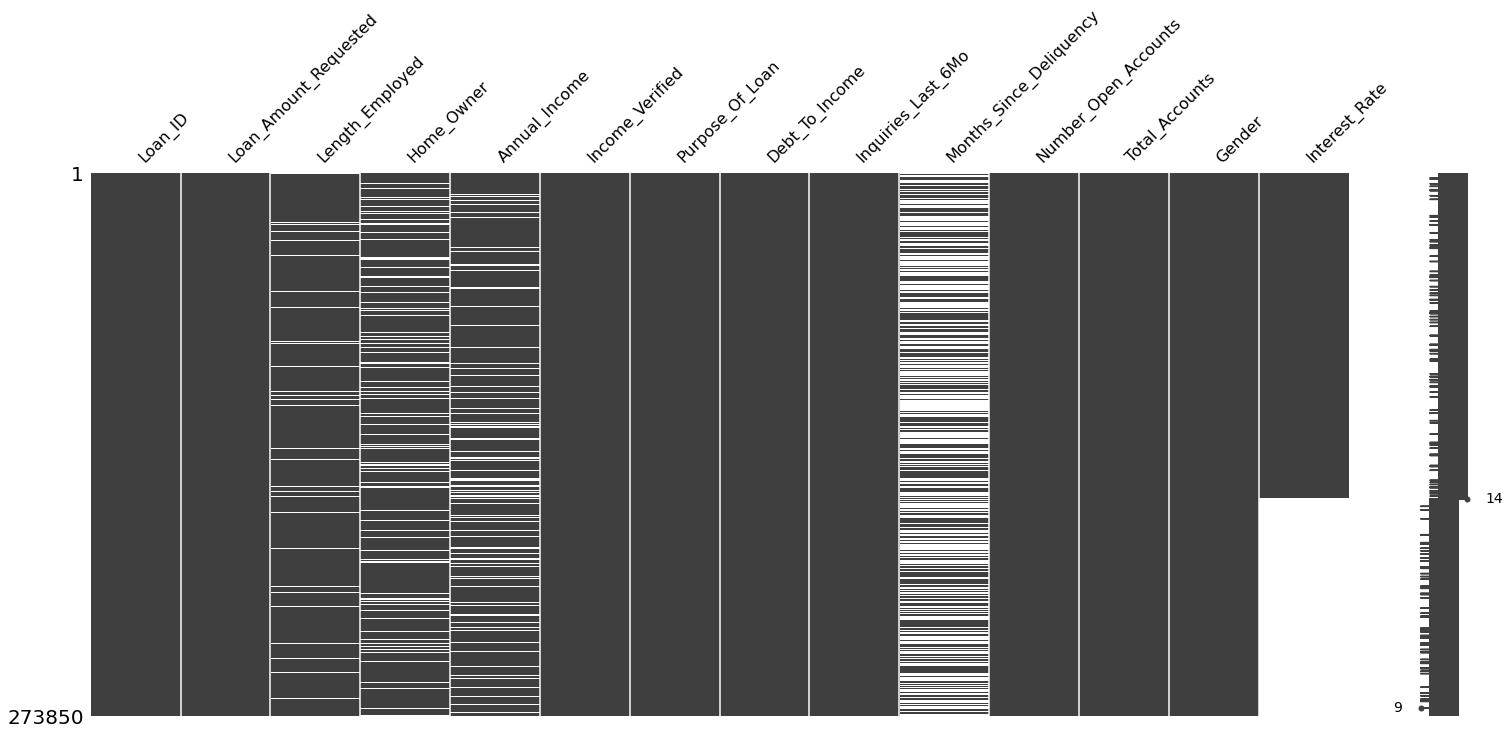

In [ ]:
missingno.matrix(data_full)

In [ ]:
# channge data type from string as float type
data_full["Loan_Amount_Requested"] = data_full["Loan_Amount_Requested"].str.replace(",", "")
data_full["Loan_Amount_Requested"] = data_full["Loan_Amount_Requested"].astype(float)

In [ ]:
# show coloumn Loan_Amount_Requested 
data_full["Loan_Amount_Requested"].describe()

count    273850.000000
mean     14352.992240 
std      8289.036702  
min      500.000000   
25%      8000.000000  
50%      12000.000000 
75%      20000.000000 
max      35000.000000 
Name: Loan_Amount_Requested, dtype: float64

In [ ]:
# fill in the missing value
data_full["Length_Employed"] = data_full["Length_Employed"].fillna("-1")
data_full["Length_Employed"] = data_full["Length_Employed"].replace("< 1 year", "0")
data_full["Length_Employed"] = data_full["Length_Employed"].replace("10+ years", "10")
data_full["Length_Employed"] = data_full["Length_Employed"].str.replace("years", "")
data_full["Length_Employed"] = data_full["Length_Employed"].str.replace("year", "")

In [ ]:
# change data type from string to int
data_full["Length_Employed"] = data_full["Length_Employed"].astype(int)

In [ ]:
# show coloumn Length_Employed
data_full["Length_Employed"].describe()

count    273850.000000
mean     5.685689     
std      3.828297     
min     -1.000000     
25%      2.000000     
50%      6.000000     
75%      10.000000    
max      10.000000    
Name: Length_Employed, dtype: float64

In [ ]:
# fill in the missing value
data_full["Home_Owner"] = data_full["Home_Owner"].fillna("Unknown")

In [ ]:
# show coloumn Home_Owner
data_full["Home_Owner"].describe()

count     273850  
unique    6       
top       Mortgage
freq      117270  
Name: Home_Owner, dtype: object

In [ ]:
# fill in data from float type as float type
data_full["Annual_Income"] = data_full["Annual_Income"].fillna("-1")
data_full["Annual_Income"] = data_full["Annual_Income"].astype(float)

In [ ]:
# show coloumn Annual_Income
data_full["Annual_Income"].describe()

count    2.738500e+05
mean     6.213649e+04
std      5.999816e+04
min     -1.000000e+00
25%      3.500000e+04
50%      5.600000e+04
75%      8.200000e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [ ]:
# fill in data from float type as float type
data_full["Months_Since_Deliquency"] = data_full["Months_Since_Deliquency"].fillna("-1")
data_full["Months_Since_Deliquency"] = data_full["Months_Since_Deliquency"].astype(float)

In [ ]:
# show coloumn Months_Since_Deliquency
data_full["Months_Since_Deliquency"].describe()

count    273850.000000
mean     15.229728    
std      22.913683    
min     -1.000000     
25%     -1.000000     
50%     -1.000000     
75%      28.000000    
max      180.000000   
Name: Months_Since_Deliquency, dtype: float64

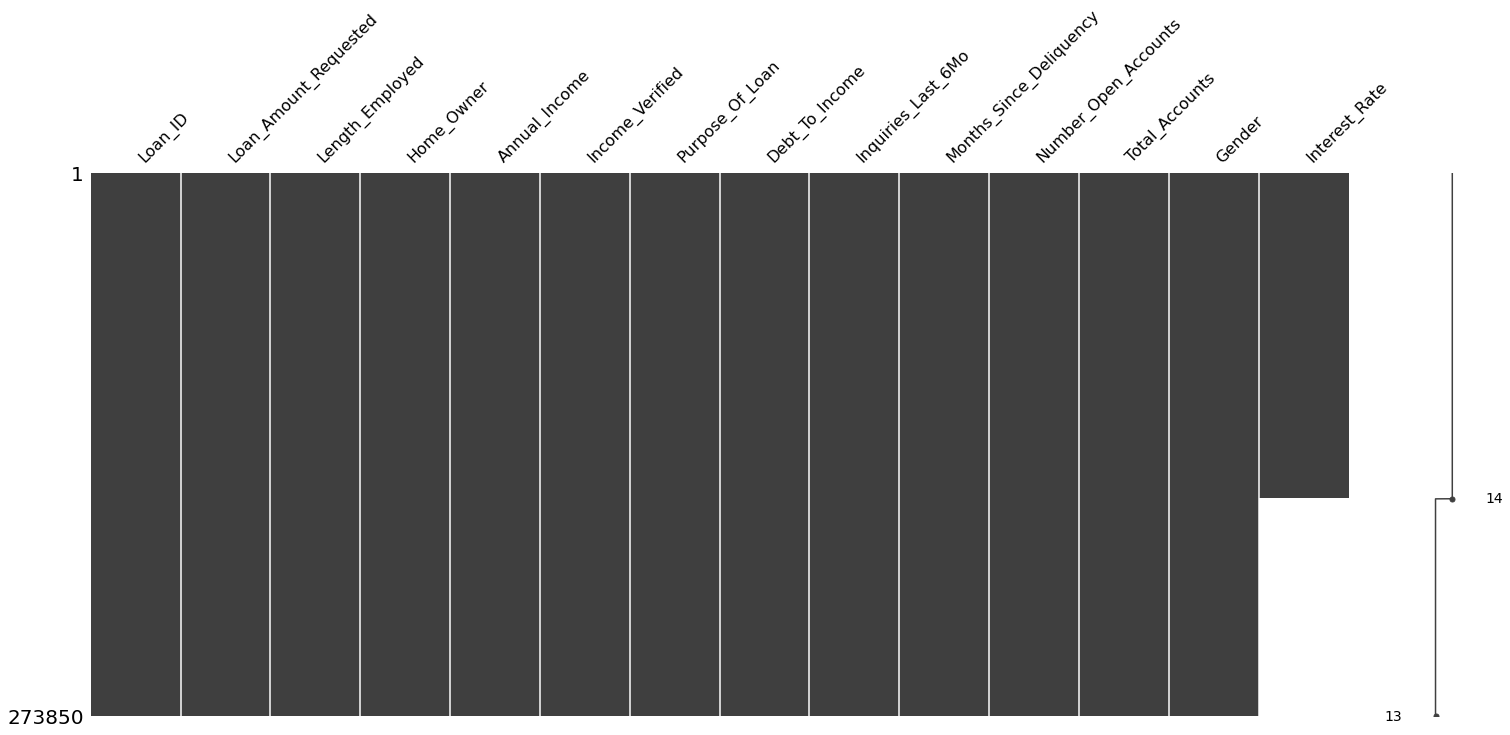

In [ ]:
# Visualization data_full with library missingno
missingno.matrix(data_full)

**categorical cleaning**

In [ ]:
data_full["Home_Owner"].value_counts()

Mortgage    117270
Rent        93542 
Unknown     42060 
Own         20879 
Other       79    
None        20    
Name: Home_Owner, dtype: int64

In [ ]:
data_full["Income_Verified"] = data_full["Income_Verified"].apply(lambda x: x.split("-")[0])

In [ ]:
data_full["Income_Verified"] = data_full["Income_Verified"].str.title()

In [ ]:
data_full["Income_Verified"].value_counts()

Verified        187329
Not Verified    86521 
Name: Income_Verified, dtype: int64

**Encoding**

In [ ]:
# for EDA later
train_clean_eda = data_full[data_full["Interest_Rate"].isnull()!= True].drop(["Loan_ID"], axis=1)

In [ ]:
# show 5 data highest
train_clean_eda.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000.0,0,Rent,68000.0,Not Verified,car,18.37,0,-1.0,9,14,Female,1.0
1,30000.0,4,Mortgage,-1.0,Verified,debt_consolidation,14.93,0,17.0,12,24,Female,3.0
2,24725.0,7,Mortgage,75566.4,Verified,debt_consolidation,15.88,0,-1.0,12,16,Male,3.0
3,16000.0,0,Unknown,56160.0,Verified,debt_consolidation,14.34,3,-1.0,16,22,Male,3.0
4,17000.0,8,Own,96000.0,Verified,debt_consolidation,22.17,1,-1.0,19,30,Female,1.0


In [ ]:
# Encoding
data_full = pd.get_dummies(data_full)

In [ ]:
# find out row and coloumn from test
data_full.shape

(273850, 34)

In [ ]:
# show 5 data highest
data_full.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Home_Owner_Unknown,Income_Verified_Not Verified,Income_Verified_Verified,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,10000001,7000.0,0,68000.0,18.37,0,-1.0,9,14,1.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10000002,30000.0,4,-1.0,14.93,0,17.0,12,24,3.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,10000003,24725.0,7,75566.4,15.88,0,-1.0,12,16,3.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10000004,16000.0,0,56160.0,14.34,3,-1.0,16,22,3.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10000005,17000.0,8,96000.0,22.17,1,-1.0,19,30,1.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

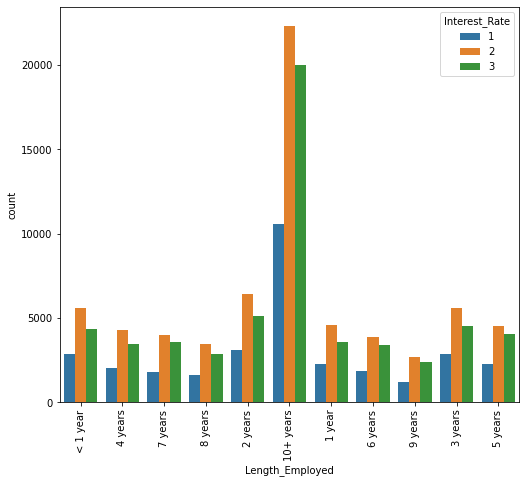

In [ ]:
# Data with Visualization
plt.figure(figsize=(28,16))
plt.subplot(2,3,1)
sns.countplot(train['Length_Employed'], hue=train['Interest_Rate'])
plt.xticks(rotation=90)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

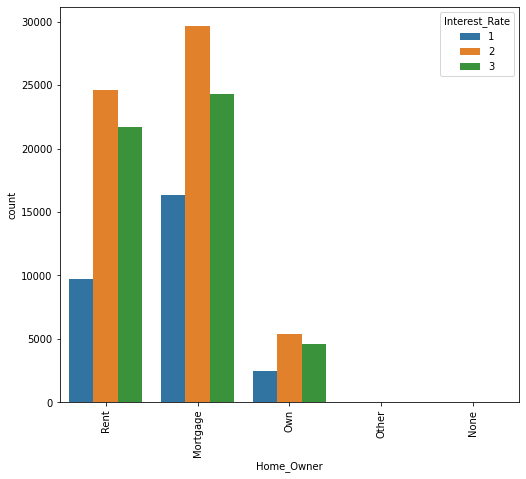

In [ ]:
# Data with Visualization
plt.figure(figsize=(28,16))
plt.subplot(2,3,1)
sns.countplot(train['Home_Owner'], hue=train['Interest_Rate'])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

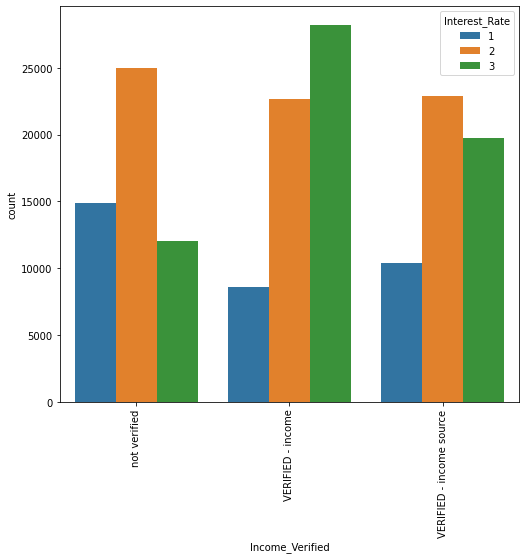

In [ ]:
# Data with Visualization
plt.figure(figsize=(28,16))
plt.subplot(2,3,1)
sns.countplot(train['Income_Verified'], hue=train['Interest_Rate'])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

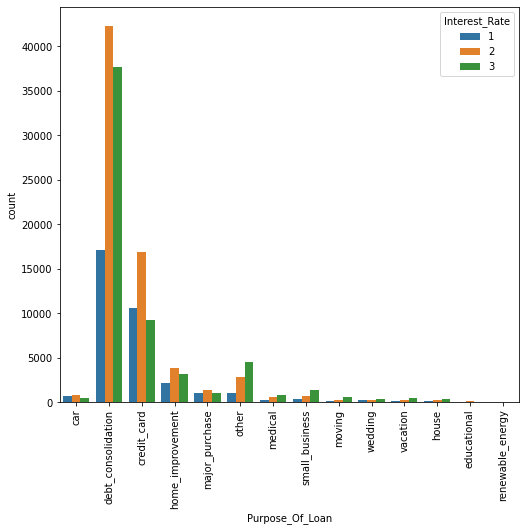

In [ ]:
# Data with Visualization
plt.figure(figsize=(28,16))
plt.subplot(2,3,1)
sns.countplot(train['Purpose_Of_Loan'], hue=train['Interest_Rate'])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

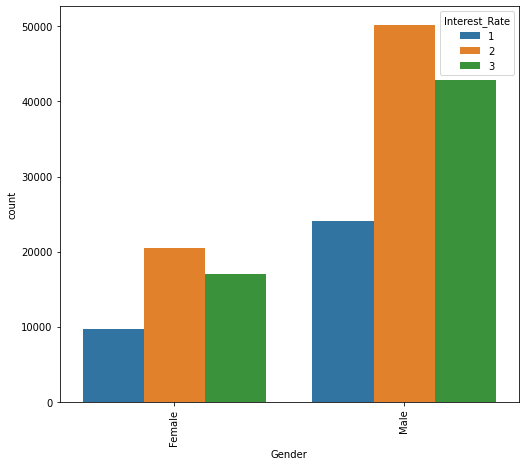

In [ ]:
# Data with Visualization
plt.figure(figsize=(28,16))
plt.subplot(2,3,1)
sns.countplot(train['Gender'], hue=train['Interest_Rate'])
plt.xticks(rotation=90)

Train Test Split

In [ ]:
# show data_full
data_full.head()

NameError: ignored

In [ ]:
# removing the target column Interest_Rate from dataset and assigning to X
X = data_full[data_full["Interest_Rate"].isnull() != True].drop(["Loan_ID", "Interest_Rate"], axis=1)
# assigning the target column Interest_Rate to y
y = data_full[data_full["Interest_Rate"].isnull() != True]["Interest_Rate"]

# removing the target column Interest_Rate from dataset and assigning to X
X_test = data_full[data_full["Interest_Rate"].isnull() == True].drop(["Loan_ID", "Interest_Rate"], axis=1)

# checking the shapes
print(X.shape)
print(y.shape)
print(X_test.shape)

(164309, 32)
(164309,)
(109541, 32)


In [ ]:
# These are the class weights for each class
class_1 =(len(y) - len(y[y==1]))/len(y)
class_2 =(len(y) - len(y[y==2]))/len(y)
class_3 =(len(y) - len(y[y==3]))/len(y)
print(class_1,class_2,class_3)

0.7942535101546476 0.5704434936613332 0.6353029961840191


In [ ]:
# its better to give a highter weight than the weight calculated. The idea is that model should know that class 2 is abundent.
weight = {1: '0.79', 2: '0.65', 3: '0.68'}

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

# C. modeling

A.  XGBoost

In [ ]:
err_xgb = []
y_pred_tot_xgb = []

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
i = 1
for train_index, test_index in fold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = XGBClassifier(boosting_type="gbdt",
                      max_depth=5,
                      class_weight = weight,
                      learning_rate=0.07,
                      n_estimators=5000,
                      random_state=101)
    m.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_val, y_val)],
          early_stopping_rounds=100,
          verbose=200)
    pred_y = m.predict_proba(X_val)
    print("err_xgb: ", f1_score(y_pred=[np.argmax(x) for x in pred_y], y_true=y_val, average='weighted'))
    err_xgb.append(f1_score(y_pred=[np.argmax(x) for x in pred_y],y_true=y_val,average='weighted'))
    pred_test = m.predict_proba(X_test)
    i = i + 1
    y_pred_tot_xgb.append(pred_test)

[0]	validation_0-merror:0.493484	validation_1-merror:0.498935
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[200]	validation_0-merror:0.442696	validation_1-merror:0.461993
[400]	validation_0-merror:0.428112	validation_1-merror:0.460136
[600]	validation_0-merror:0.417355	validation_1-merror:0.459832
Stopping. Best iteration:
[522]	validation_0-merror:0.421113	validation_1-merror:0.458493

err_xgb:  0.1987961287131575
[0]	validation_0-merror:0.491369	validation_1-merror:0.496653
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[200]	validation_0-merror:0.44354	validation_1-merror:0.464792
[400]	validation_0-merror:0.428949	validation_1-merror:0.460441
Stopping. Best iteration:
[404]	validation_0-merror:0.428941	validation_1-merror:0.46038

err_xgb:  0.1966565

In [ ]:
print("The Average Error: {}".format(np.mean(err_xgb,0)))

The Average Error: 0.19667499574271358


B. CatBoost

In [ ]:
err_CB = []
y_pred_tot_cb = []

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
i = 1
for train_index, test_index in fold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = CatBoostClassifier(n_estimators=5000,
                           random_state=101,
                           learning_rate=0.03, 
                           max_depth=5)
    m.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_val, y_val)],
          early_stopping_rounds=200,
          verbose=200)
    pred_y = m.predict_proba(X_val)
    print("err_cb: ", f1_score(y_pred=[np.argmax(x) for x in pred_y], y_true=y_val, average='weighted'))
    err_CB.append(f1_score(y_pred=[np.argmax(x) for x in pred_y], y_true=y_val, average='weighted'))
    pred_test = m.predict_proba(X_test)
    i = i + 1
    y_pred_tot_cb.append(pred_test)

0:	learn: 1.0931576	test: 1.0931576	test1: 1.0932065	best: 1.0932065 (0)	total: 141ms	remaining: 11m 46s
200:	learn: 0.9425481	test: 0.9425481	test1: 0.9451482	best: 0.9451482 (200)	total: 16.6s	remaining: 6m 37s
400:	learn: 0.9301626	test: 0.9301626	test1: 0.9347169	best: 0.9347169 (400)	total: 32.7s	remaining: 6m 15s
600:	learn: 0.9229309	test: 0.9229309	test1: 0.9292833	best: 0.9292833 (600)	total: 48.7s	remaining: 5m 56s
800:	learn: 0.9184301	test: 0.9184301	test1: 0.9267472	best: 0.9267472 (800)	total: 1m 4s	remaining: 5m 38s
1000:	learn: 0.9148562	test: 0.9148562	test1: 0.9248465	best: 0.9248465 (1000)	total: 1m 20s	remaining: 5m 21s
1200:	learn: 0.9118885	test: 0.9118885	test1: 0.9235774	best: 0.9235774 (1200)	total: 1m 36s	remaining: 5m 5s
1400:	learn: 0.9092513	test: 0.9092513	test1: 0.9226702	best: 0.9226702 (1400)	total: 1m 52s	remaining: 4m 49s
1600:	learn: 0.9068788	test: 0.9068788	test1: 0.9218823	best: 0.9218823 (1600)	total: 2m 8s	remaining: 4m 33s
1800:	learn: 0.904649

In [ ]:
print("The Average Error: {}".format(np.mean(err_CB,0)))

The Average Error: 0.19598476229466694
